# Теория графов в машинном и глубинном обучении

Сложность представления данных для глубокого обучения растет с каждым днем. Нейронные сети на основе данных в виде графа (Graph Neural Network, GNN) стали одним из прорывов последних лет.

## Введение

С помощью графа мы можем представить сколь угодно сложные данные. Такая структура подходит начиная от разработки лекарств и заканчивая рекомендациями по дружбе в социальных сетях.

**Что такое граф?**

Граф G - это набор узлов (вершин), соединенных ориентированными/неориентированными ребрами. Примеры узлов:

    - атомы в молекулах;
    - пользователи в социальной сети;
    - города в транспортной системе;
    - игроки в командных видах спорта;
    - нейроны мозга;
    - пиксели;
    - маски сегментации в изображениях и др.

<p style="text-align: center;"> 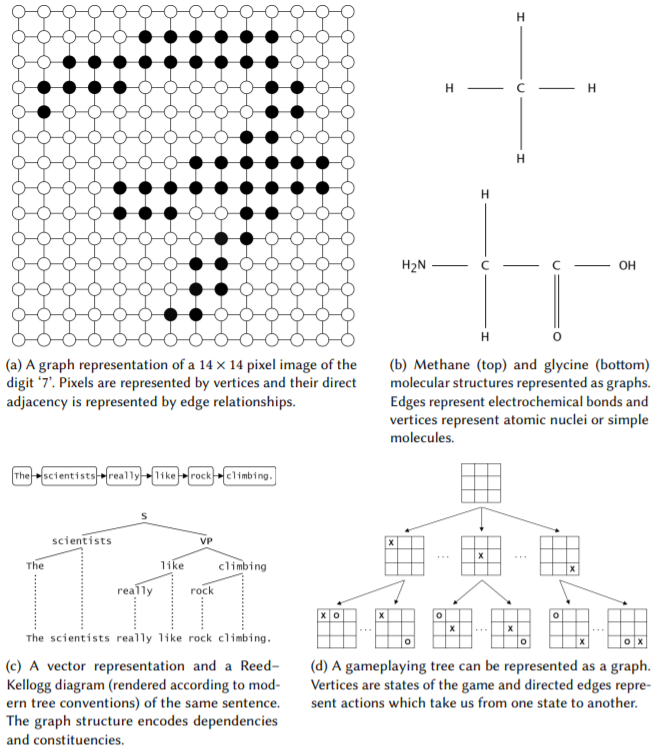 </p>



Сами нейронные сети могут рассматриваться как граф, где узлы - это нейроны, а ребра - это веса, или где узлы - это слои, а ребра обозначают поток прямого/обратного прохода (в этом случае мы говорим о вычислительном графе, используемом в TensorFlow, PyTorch и других фреймворках). Решаемая задача может быть оптимизацией вычислительного графа, поиском нейронной архитектуры, анализом поведения при обучении и т.д.

## Изображения как графы

Обычно изображения представляются как прямоугольные сетки с каналами изображений, представленных в виде матриц (например, 244x244x3). Еще один способ представлять изображения - это графы с обычной структурой, где каждый пиксель представляет собой узел и соединяется ребром с соседними пикселями. Каждый не граничный пиксель имеет ровно 8 соседей, а информация, хранящаяся в каждом узле, представляет собой трехмерный вектор, содержащий значение RGB пикселя.

Способ визуализации связности графа - это его матрица смежности. Мы упорядочиваем узлы, в данном случае каждый из 25 пикселей в простом изображении 5x5, и заполняем матрицу n узлов × n узлов записью, если два узла имеют общую границу. Обратите внимание, что каждое из этих трех представлений ниже - это разные представления одного и того же фрагмента данных.

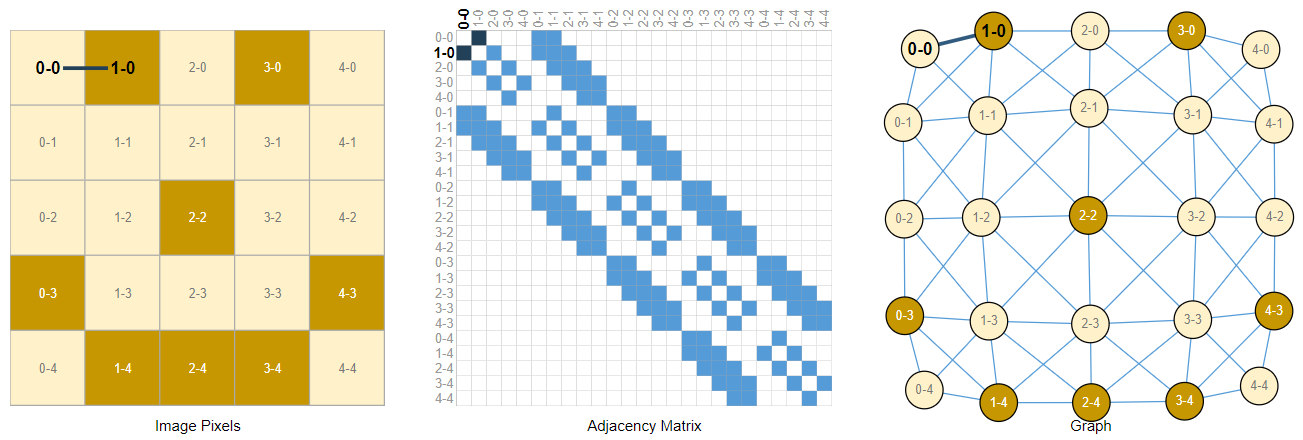

<p style="text-align: center;"> 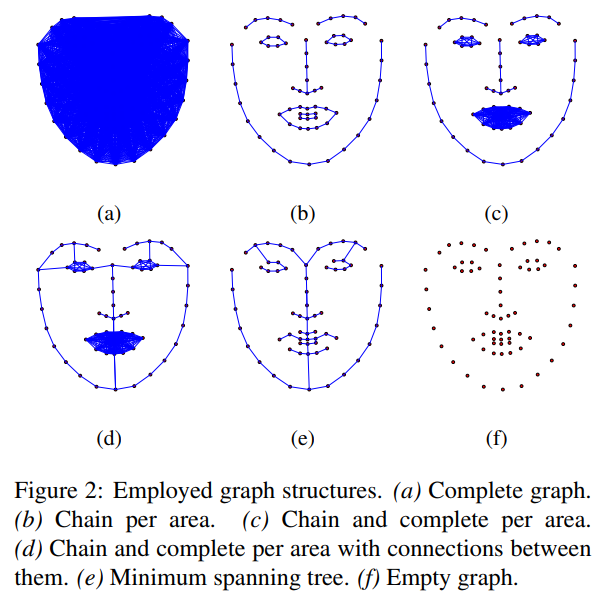 </p>

## Текст как графы

Мы можем представить текст как последовательность индексов, проиндексировав каждый символ, слово или токен. Получится простой ориентированный граф, в котором каждый символ или индекс является узлом и соединяется ребром с узлом, который следует за ним.

<p style="text-align: center;"> 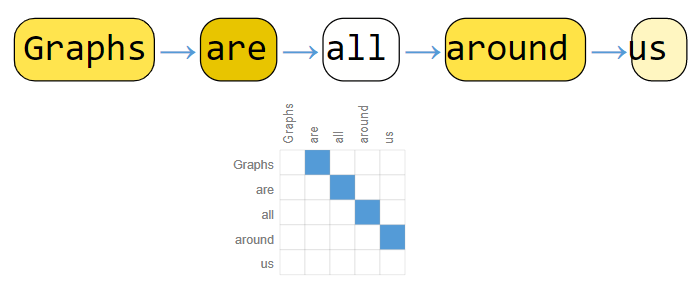 </p>

Конечно, на практике текст и изображения обычно кодируются не так: эти графические представления избыточны, поскольку все изображения и весь текст будут иметь очень обычную структуру. Например, изображения имеют полосатую структуру в своей матрице смежности, потому что все узлы (пиксели) соединены в сетку. Матрица смежности для текста - это просто диагональная линия, потому что каждое слово соединяется только с предыдущим словом и со следующим.

## Предсказание на графах

В целом задачи предсказания на графовых данных разделяются на три типа:
1. Предсказание свойства для всего графа (graph-level).
2. Предсказание свойства для каждого узла (node-level).
3. Предсказание свойства для каждого ребра (edge-level).

### Graph-level задачи

Такие задачи аналогичны проблемам классификации изображений MNIST и CIFAR, когда мы хотим предсказать метку всему изображению. В случае с текстом аналогичная проблема связана с анализом эмоций, когда мы хотим сразу определить настроение или эмоцию всего предложения.
![image.png](attachment:90e8612c-b0db-4078-9754-e6998ab4113b.png)

### Node-level задачи

Следуя аналогии с изображениями, проблемы прогнозирования на уровне узлов аналогичны сегментации изображения, когда мы пытаемся обозначить роль каждого пикселя в изображении. В случае с текстом аналогичная задача будет заключаться в прогнозировании частей речи каждого слова в предложении (например, существительного, глагола, наречия и т.д.).

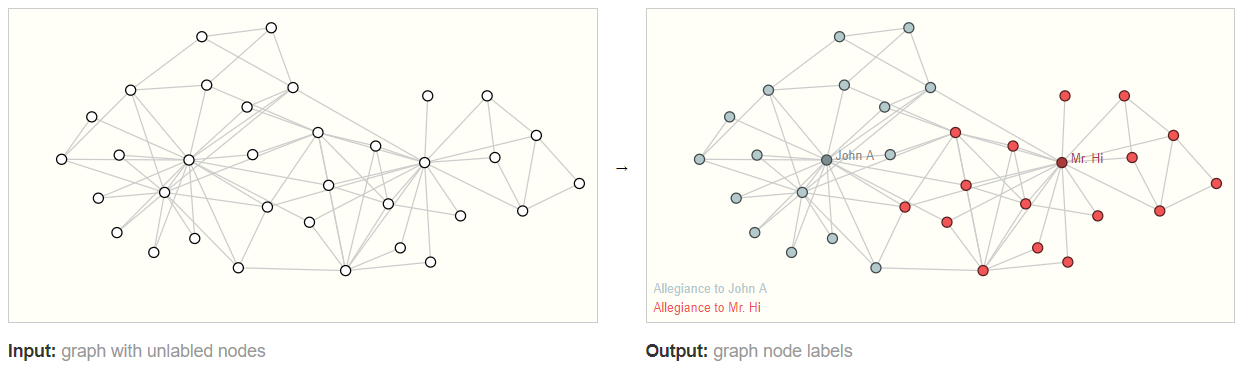

### Edge-level задачи

Одним из примеров решения такой задачи является понимание сцены изображения. Помимо идентификации объектов на изображении, модели глубокого обучения могут использоваться для прогнозирования взаимосвязи между ними. Мы можем сформулировать это как классификацию на уровне ребер: учитывая узлы, которые представляют объекты на изображении, мы хотим предсказать, какие из этих узлов имеют общую границу или каково значение этого ребра. Если мы хотим обнаружить связи между сущностями, мы могли бы считать граф полностью связным и на основе их предсказанного значения обрезать ребра, чтобы получить разреженный граф.

<p style="text-align: center;"> 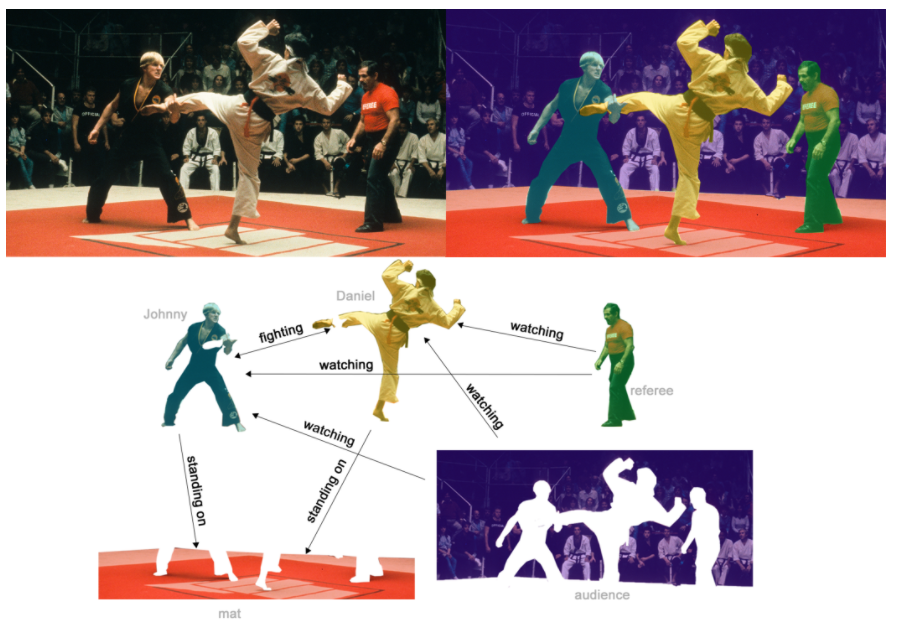 </p>

## Graph Neural Network

### Вопрос: как представлять граф?

Обычные ML и DL алгоритмы принимают на вход информацию в виде матрицы/тензора. Самый простой способ представления графа - матрица смежности (adjacency matrix). Однако, у такой матрицы также есть недостатки - если граф слишком большой, то матрица может получится разреженной, поэтому имеет смысл представлять матрицу в виде "списков смежности" (adjacency lists).

<p style="text-align: center;"> 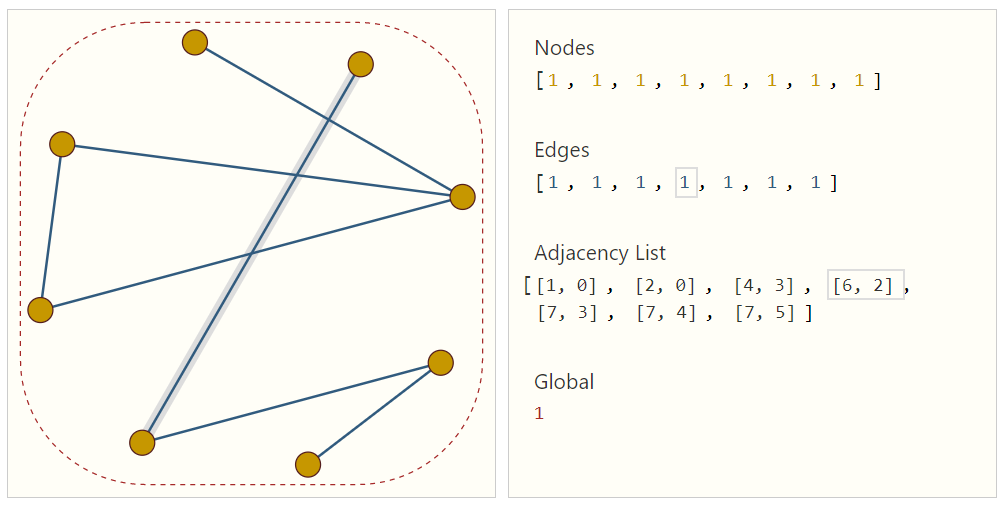 </p>

Следует отметить, что на рисунке для узлов используются скалярные значения, однако, мы же будем иметь дело с тензором, где каждый узел будет представлен в виде эмбеддинга.

<p style="text-align: center;"> 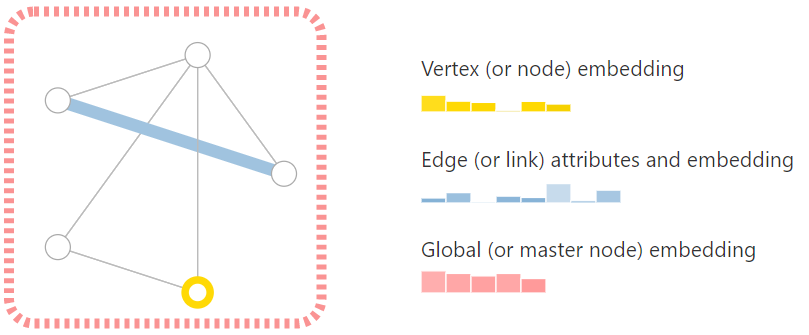 </p>

На входе и выходе GNN должен быть граф.

### Простая GNN

Теперь, когда известно, как представлять граф (векторы вместо скаляров), можно перейти построению GNN. В качестве простого примера можно представить, что каждый элемент графа (вершина, ребро, целый граф) пропускается через многослойный перцептрон (MLP) или любую другую дифференцируемую функцию. Ниже представлен слой GNN.

<p style="text-align: center;"> 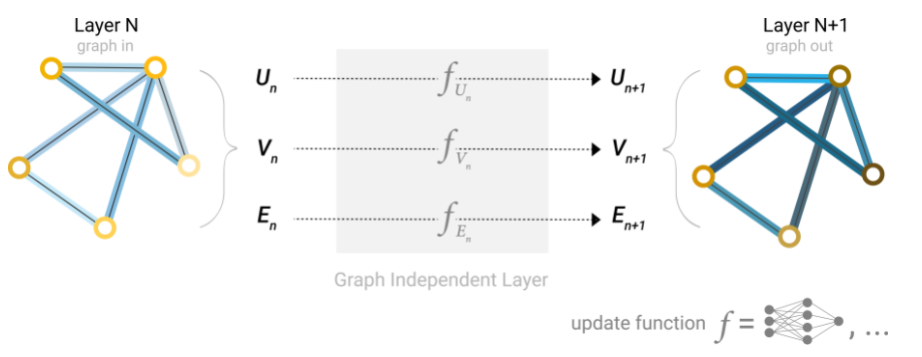 </p>

Выходной граф будет иметь ту же самую матрицу-списки смежности, то же количество embedding'ов, однако, данные вектора будут обновлены.

### Прогнозирование с помощью объединения информации (Pooling)

Рассмотрим задачу бинарной классификации, которая в целом может быть рассмотрена и как мультиклассовая задача, и как задача регрессии. Если стоит задача определить класс вершины, то мы просто применяем классификатор к вектору вершины. 

Однако, что если мы не знаем информацию (или она недостаточно полна) о вершине, однако, у нас есть информация о ребре и при этом нам также необходимо классифицировать именно вершину.

<p style="text-align: center;"> 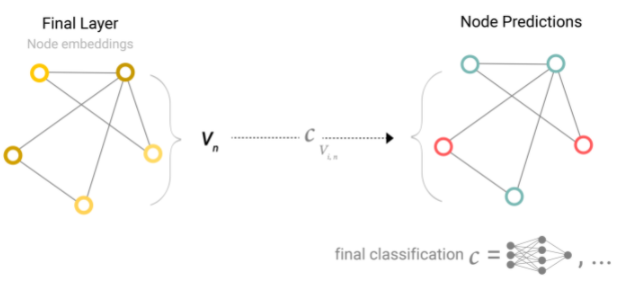 </p>

Передать информацию от ребра мы можем с помощью Pooling'a, который состоит из 2 шагов:
1. Векторы каждого элемента, который должен быть объединен, собираются и конкатенируются в матрицу.
2. Собранные векторы затем агрегируются, обычно с помощью операции суммирования.

<p style="text-align: center;"> 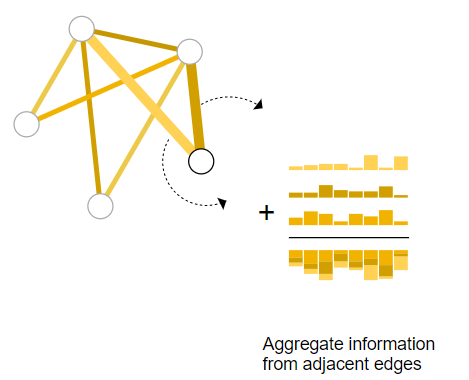 </p>

В целом же модель будет выглядеть таким образом.

<p style="text-align: center;"> 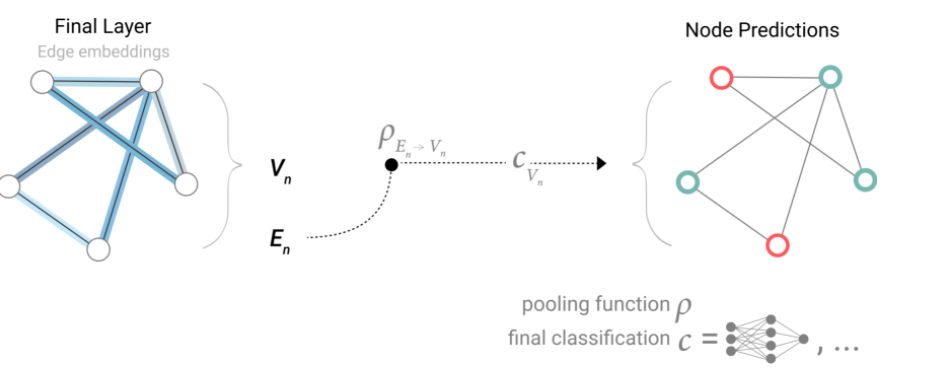 </p>

Итоговый вид модели GNN.

<p style="text-align: center;"> 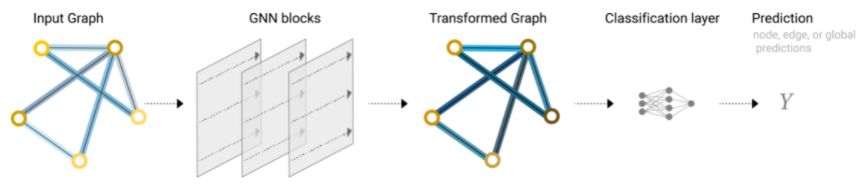 </p>


## Свертки в Графовых сетях

Как известно, CNN способны очень хорошо извлекать признаки из изображений. Встает вопрос: как перенести эту концепцию на графовые нейросети?

В частности, как построить и применить фильтры к графу. Также возникает проблема локализации фильтра, то есть как применить фильтр к одному узлу и взять информацию о его соседях.

Пример свертки изображения.

<p style="text-align: center;"> 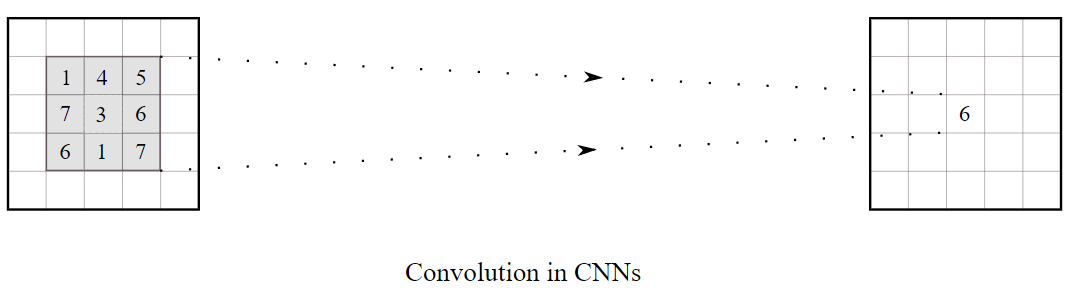 </p>

Пример свертки в графах.

<p style="text-align: center;"> 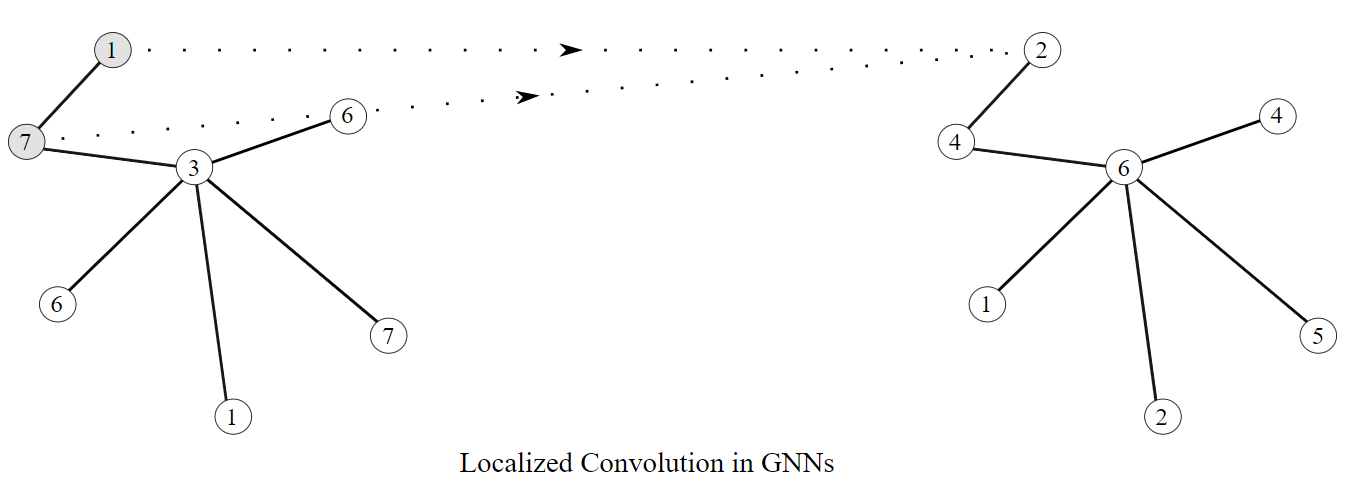 </p>

<p style="text-align: center;"> 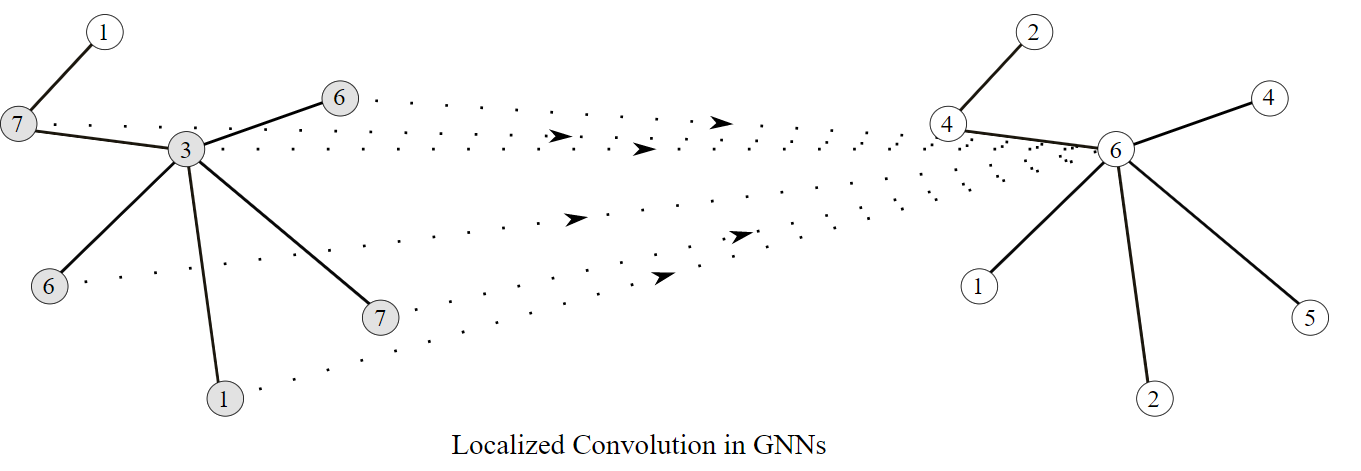 </p>

### Полиномиальные фильтры на графах

**Матрица Лапласа**

Матрица Лапласа (матрица Кирхгофа) - квадратная матрица n x n, которая вычисляется путем разности двух других матриц: диагональной и матрциы смежности.

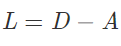

<p style="text-align: center;"> 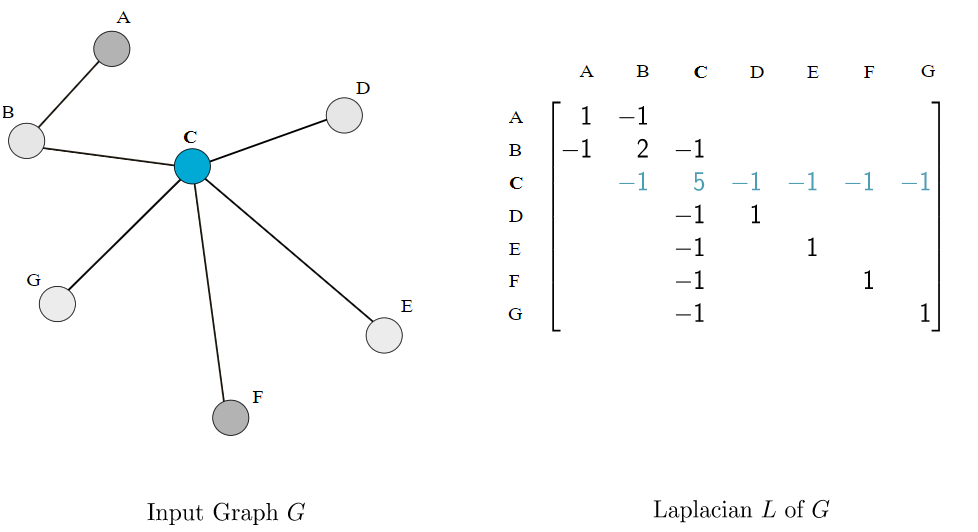 </p>

**Полином Лапласиана**

После определения матрицы Лапласиана можно задать следующий полином:

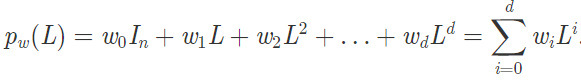

Каждый такой полином может быть представлен своим вектором весов.

Такие полиномы могут рассматриваться, как фильтры в CNN, а веса $ w $ как веса фильтров.

В данном полиноме с помощью несложного математических преобразований доказывается, что степень $ d $ отвечает за локализованное применение фильтра. Применение конволюции к узлу $ v $ применяется только с узлами $ u $, которые удалены от $ v $ не более, чем на $ d $ связей.

Также вместо обычного Лапласиана может использоваться нормализованный Лапласиан:

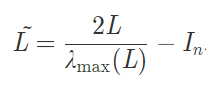

### Вычисление эмбеддингов

Теперь, зная как выглядит GNN, можно посмотреть на то, как считаются векторы признаков для каждого узла.

**Дано:** пусть есть K слоев GNN, где $ k^{-ый} $ слой имеет свой собственный набор весов $ w^{(k)} $

**Вычисление эмбеддинга для $ k^{-ого} $ слоя:**

$ h^{(0)} = x $ - инициализируем начальный вектор настоящими признаками

Итерируясь по $ k = 1,...,K $

Вычисляем матрицу $ p^{(k)} $, определенную как полином: $ p^{(k)} = p_{w^{(k)}}(L)$

Применяем конволюцию к предыдущему вектору признаков: $ g^{(k)} = p^{(k)} * h^{(k-1)}$

Применяем нелинейность: $ h^{(k)} = \sigma(g^{(k)})$

**Примечание:** в данной сети на одном слое используются одни и те же веса для каждого узла, таким образом, повторяя свертку в CNN.

В целом уравнение может быть представлено следующим образом:

<p style="text-align: center;"> 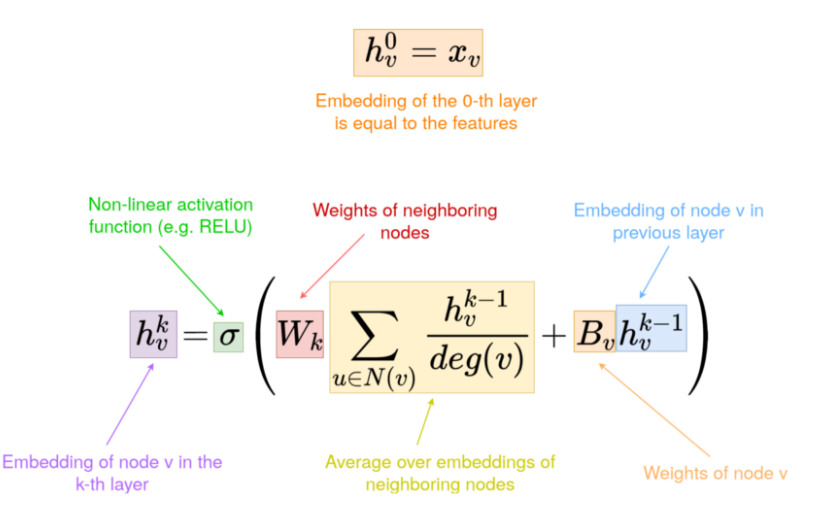 </p>

## Имплементация GCN

### Torch_geometric

Для имплементации GCN используем специально созданную для работы с графами библиотеку **torch_geometric**. Данный фреймворк разработан на основе PyTorch и имеет весь его функционал. Данная библиотека содержит в себе множество методов и структур, созданных по известным статьям. Также он содержит датасеты, в частности, Cora Dataset, с которым мы будем работать ниже.

**Cora Dataset** - датасет, содержащий 2708 научных публикаций, принадлещих 7 классам. Также он содержит 10556 связей, которые обозначают сеть цитирования между статьями.

In [1]:
import tensorflow
from torch_geometric.datasets import Planetoid
import torch
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = Planetoid(root='/tmp/Cora', name='Cora')

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
data = dataset[0].to(device)
data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [4]:
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [129]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16).to(device)
print(model)

GCN(
  (conv1): GCNConv(
    (lin): Linear(in_features=1433, out_features=16, bias=True)
  )
  (conv2): GCNConv(
    (lin): Linear(in_features=16, out_features=7, bias=True)
  )
)


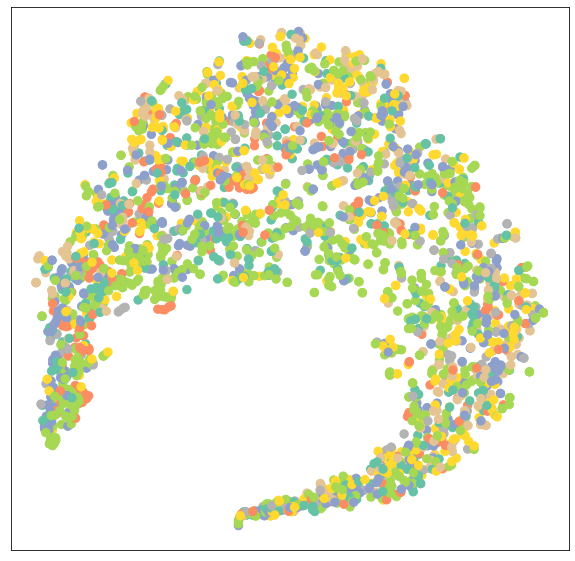

In [127]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y.detach().cpu().numpy())

In [130]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  # Use the class with highest probability.
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
    return test_acc


for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 010, Loss: 1.1050
Epoch: 020, Loss: 0.4085
Epoch: 030, Loss: 0.1694
Epoch: 040, Loss: 0.0839
Epoch: 050, Loss: 0.0815
Epoch: 060, Loss: 0.0630
Epoch: 070, Loss: 0.0377
Epoch: 080, Loss: 0.0735
Epoch: 090, Loss: 0.0464
Epoch: 100, Loss: 0.0686


In [131]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8000


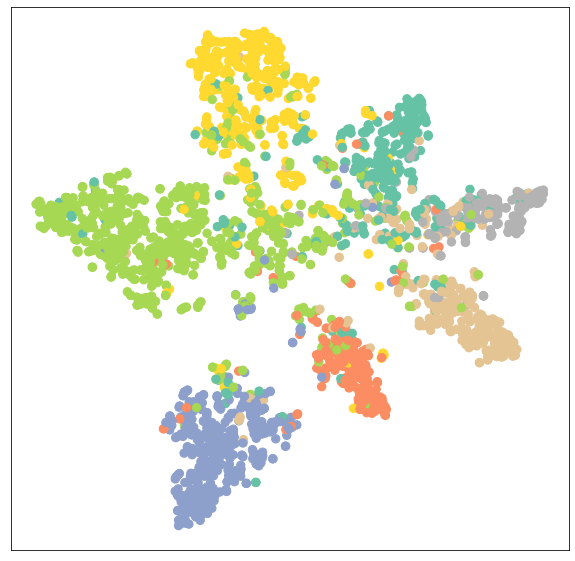

In [132]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y.detach().cpu().numpy())

### DGL

Рассмотрим еще один фреймворк для работы с графами - **DGL (Deep Graph Library)**.

DGL создан на основе существующих тензорных фреймворках DL (Pytorch, MXNet) и упрощает реализацию нейронных сетей на основе графов.

**Задача**

Рассматриваемая задача называется «Клуб карате Захари». Клуб карате - это социальная сеть, в которую входят 34 участника и документооборот между ними. Позже клуб делится на два сообщества во главе с инструктором (узел 0) и президентом клуба (узел 33).

In [134]:
# установим dgl
#!pip install dgl

In [135]:
import dgl

def build_karate_club_graph():
    g = dgl.DGLGraph()
    # add 34 nodes into the graph; nodes are labeled from 0~33
    g.add_nodes(34)
    # all 78 edges as a list of tuples
    edge_list = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
        (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
        (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
        (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
        (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
        (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
        (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
        (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
        (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
        (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
        (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
        (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
        (33, 31), (33, 32)]
    # add edges to two lists of nodes: src and dst
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    # edges are directional in DGL; make them bi-directional
    g.add_edges(dst, src)

    return g

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [136]:
G = build_karate_club_graph()
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 34 nodes.
We have 156 edges.


/opt/conda/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


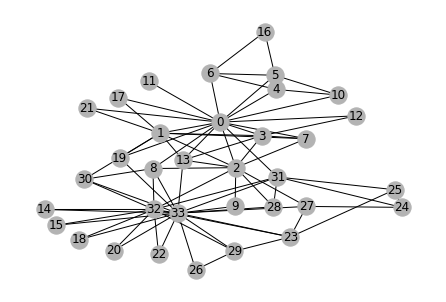

In [137]:
# Since the actual graph is undirected, we convert it for visualization purpose.
nx_G = G.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [138]:
G.ndata['feat'] = torch.eye(34)

In [139]:
# print out node 2's input feature
print(G.nodes[2].data['feat'])

# print out node 10 and 11's input features
print(G.nodes[[10, 11]].data['feat'])

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [152]:
import torch.nn as nn
import torch.nn.functional as F

# Define the message and reduce function
# NOTE: We ignore the GCN's normalization constant c_ij for this tutorial.
def gcn_message(edges):
    # The argument is a batch of edges.
    # This computes a (batch of) message called 'msg' using the source node's feature 'h'.
    return {'msg' : edges.src['h']}

def gcn_reduce(nodes):
    # The argument is a batch of nodes.
    # This computes the new 'h' features by summing received 'msg' in each node's mailbox.
    return {'h' : torch.sum(nodes.mailbox['msg'], dim=1)}

# Define the GCNLayer module
class GCNLayer(nn.Module):
    def __init__(self, in_feats, out_feats):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)

    def forward(self, g, inputs):
        # g is the graph and the inputs is the input node features
        # first set the node features
        g.ndata['h'] = inputs
        # trigger message passing on all edges 
        # trigger aggregation at all nodes
        g.send_and_recv(g.edges(), gcn_message, gcn_reduce)
        # get the result node features
        h = g.ndata.pop('h')
        # perform linear transformation
        return self.linear(h)


In [153]:
# Define a 2-layer GCN model
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.gcn1 = GCNLayer(in_feats, hidden_size)
        self.gcn2 = GCNLayer(hidden_size, num_classes)

    def forward(self, g, inputs):
        h = self.gcn1(g, inputs)
        h = torch.relu(h)
        h = self.gcn2(g, h)
        return h
# The first layer transforms input features of size of 34 to a hidden size of 5.
# The second layer transforms the hidden layer and produces output features of
# size 2, corresponding to the two groups of the karate club.
net = GCN(34, 5, 2)

In [154]:
inputs = torch.eye(34)
labeled_nodes = torch.tensor([0, 33])  # only the instructor and the president nodes are labeled
labels = torch.tensor([0, 1])  # their labels are different

In [155]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
all_logits = []
for epoch in range(30):
    logits = net(G, inputs)
    # we save the logits for visualization later
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    # we only compute loss for labeled nodes
    loss = F.nll_loss(logp[labeled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

Epoch 0 | Loss: 1.1001
Epoch 1 | Loss: 0.6947
Epoch 2 | Loss: 0.4484
Epoch 3 | Loss: 0.3155
Epoch 4 | Loss: 0.2347
Epoch 5 | Loss: 0.1756
Epoch 6 | Loss: 0.1274
Epoch 7 | Loss: 0.0900
Epoch 8 | Loss: 0.0610
Epoch 9 | Loss: 0.0402
Epoch 10 | Loss: 0.0267
Epoch 11 | Loss: 0.0182
Epoch 12 | Loss: 0.0130
Epoch 13 | Loss: 0.0097
Epoch 14 | Loss: 0.0076
Epoch 15 | Loss: 0.0062
Epoch 16 | Loss: 0.0051
Epoch 17 | Loss: 0.0043
Epoch 18 | Loss: 0.0036
Epoch 19 | Loss: 0.0031
Epoch 20 | Loss: 0.0027
Epoch 21 | Loss: 0.0024
Epoch 22 | Loss: 0.0021
Epoch 23 | Loss: 0.0018
Epoch 24 | Loss: 0.0016
Epoch 25 | Loss: 0.0014
Epoch 26 | Loss: 0.0013
Epoch 27 | Loss: 0.0011
Epoch 28 | Loss: 0.0010
Epoch 29 | Loss: 0.0009


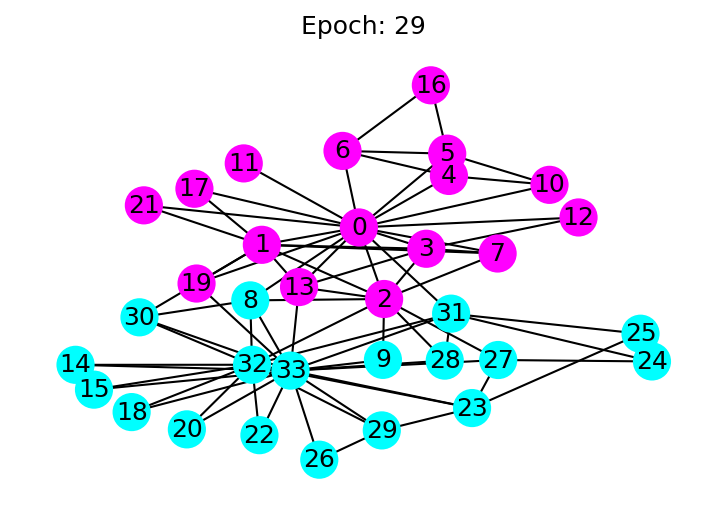

In [156]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    cls1color = '#00FFFF'
    cls2color = '#FF00FF'
    pos = {}
    colors = []
    for v in range(34):
        pos[v] = all_logits[i][v].numpy()
        cls = pos[v].argmax()
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    pos = nx.kamada_kawai_layout(nx_G)  # comment this line if you like
    nx.draw_networkx(nx_G.to_undirected(), pos, node_color=colors,
                     with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(29)  # draw the prediction of the ith epoch
plt.show()
plt.close()

## Примеры других типов графов

Существуют также другие типы графов. Например, мультиграфы (multi-edge graphs, multigraphs) - графы, где встречаются разные типы ребер. Пример: пользователи социальной сети имеют разные типы взаиомотношений (друг, родственник, муж/жена и тд).

Также бывают вложенные графы или гиперноды (hypernode). Вложенные графы полезны для представления иерархической информации. Например, мы можем рассмотреть сеть молекул, где узел представляет молекулу, а ребро является общим для двух молекул.

Другой тип графа - это гиперграф, в котором ребро может быть связано с несколькими узлами, не только с двумя. Для данного графа мы можем построить гиперграф, определив сообщества узлов и назначив гиперребро, которое подключено ко всем узлам в сети.

<p style="text-align: center;"> 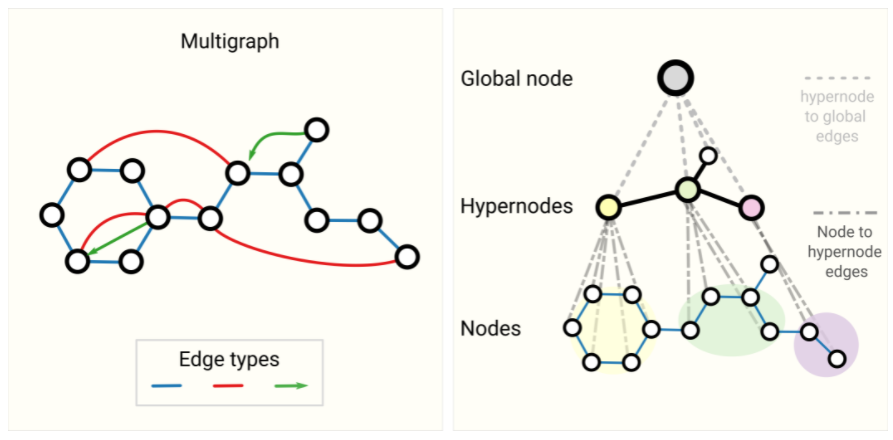 </p>

## Sampling и Batching графов

Сэмплирование и разбиение графов на батчи также является немаленькой задачаей. Обычный подход здесь не совсем уместен, так как графы имеют разный набор узлов и ребер, поэтому мы не можем иметь постоянный размер батча. В случае графов основная идея - создать подграф, который будет иметь все основные свойства исходного графа. Однако опять же могут возникнуть трудности, например, в сетях цитирования такой подход может иметь смысл, но в случае с молекулами при создании подграфа мы получаем другую меньшую молекулу.

<p style="text-align: center;"> 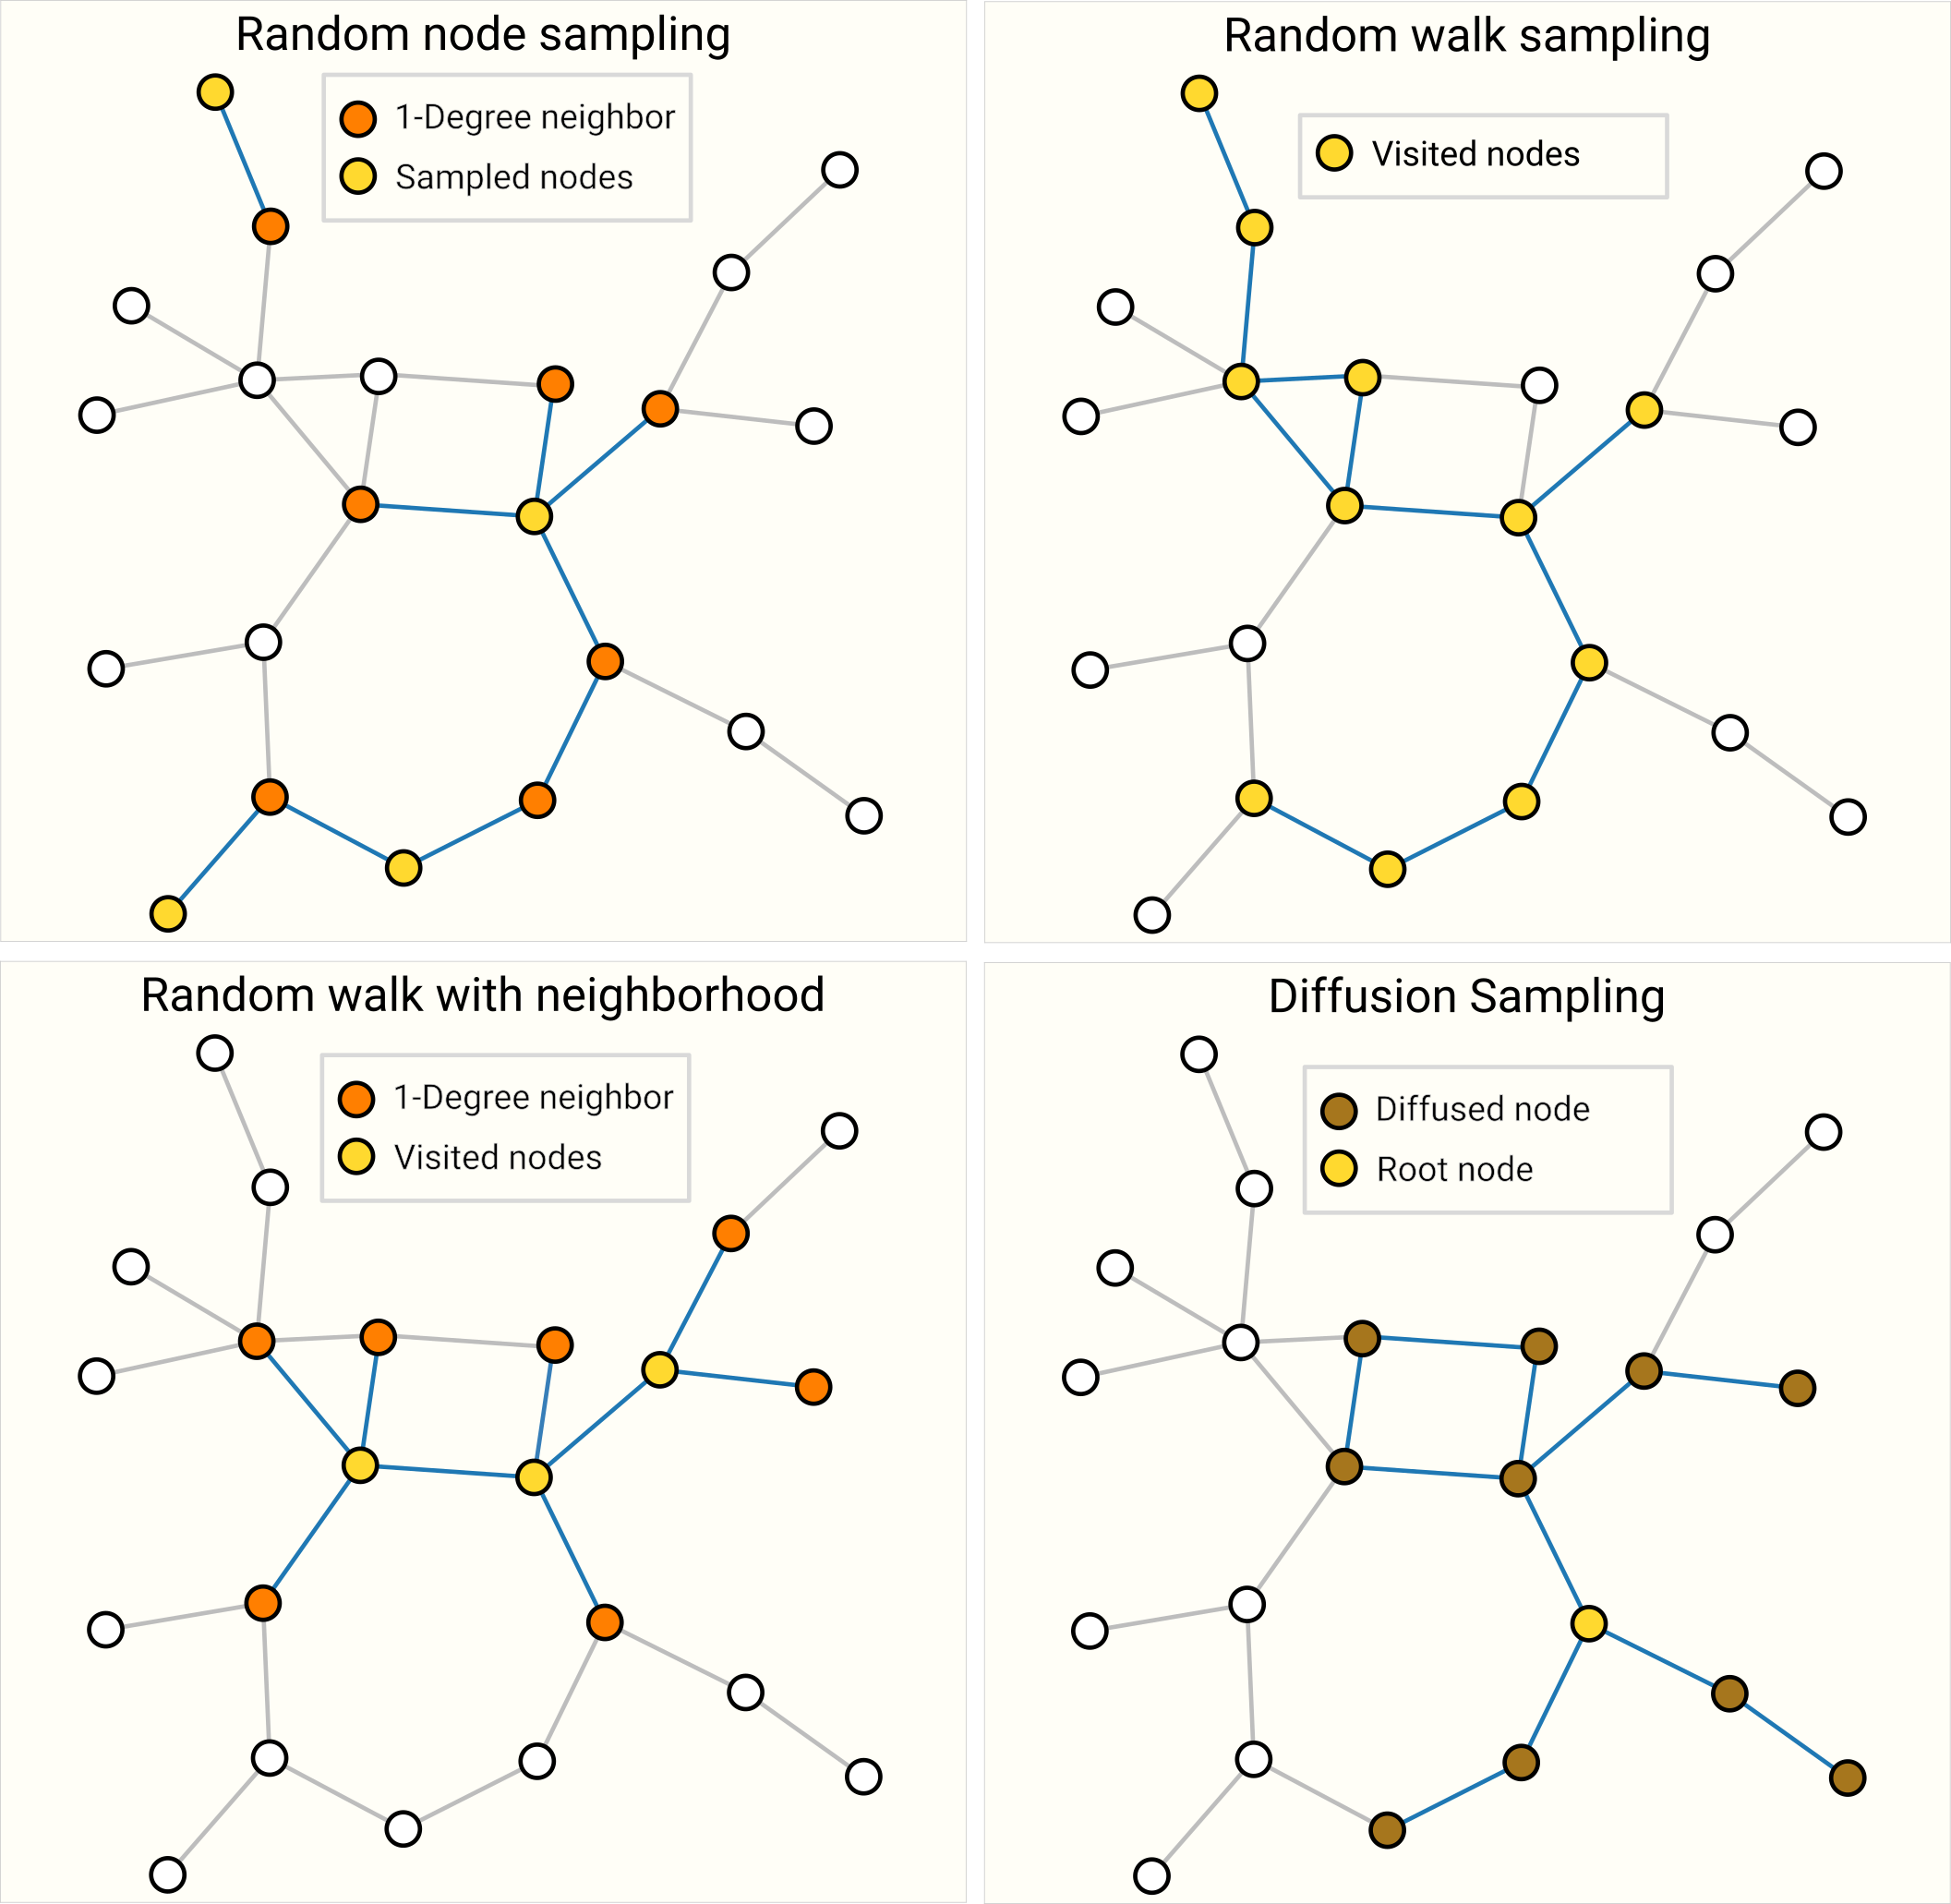 </p>

## Дополнительные источники

1. https://distill.pub/2021/gnn-intro/#graph-to-tensor
2. https://distill.pub/2021/understanding-gnns/
3. https://theaisummer.com/graph-convolutional-networks/
4. https://neerc.ifmo.ru/wiki/index.php?title=%D0%93%D1%80%D0%B0%D1%84%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8
5. https://habr.com/ru/company/mailru/blog/557280/
6. Графовый Лапласиан: https://csustan.csustan.edu/~tom/Clustering/GraphLaplacian-tutorial.pdf
7. Документация по DGL: https://docs.dgl.ai/